# LogisticRegression Exam one
- time : 2019-9-18
- author : HB

In [1]:
# import necessary package
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;
# The package is used to get the optimal parameters
import scipy.optimize as opt;

# Get data

In [2]:
data = pd.read_csv('ex2data2.txt',names=['Test1','Test2','Desicion']);
data.head()

,Test1,Test2,Desicion
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


# Plot data

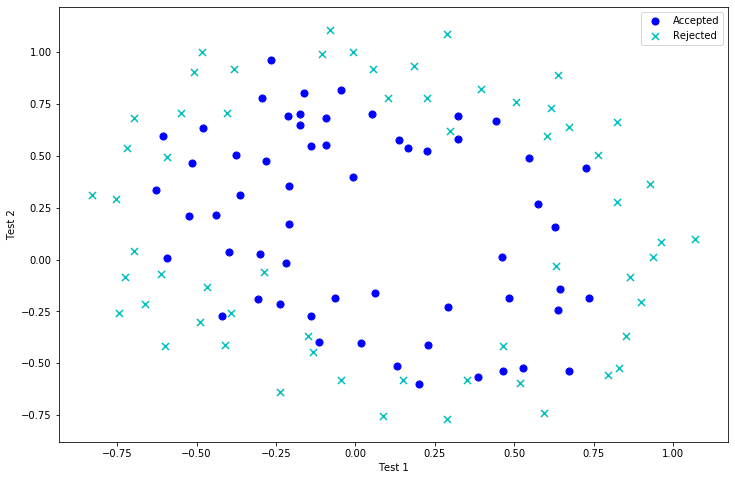

In [3]:
def plot_data(ax):
    pos = data[data['Desicion'].isin([1])];
    neg = data[data['Desicion'].isin([0])];
    ax.scatter(pos['Test1'],pos['Test2'],s=50,c='b',marker='o',label='Accepted');
    ax.scatter(neg['Test1'],neg['Test2'],s=50,c='c',marker='x',label='Rejected');
    ax.legend(loc=1);
    ax.set_xlabel('Test 1');
    ax.set_ylabel('Test 2');
    plt.show();
fig,ax = plt.subplots(figsize=(12,8));
plot_data(ax); 

# Public Function

In [4]:
# extend feature items(X1 X2 is array)
def map_feature(X1,X2):
    # 存储新的特征
    out = np.ones([len(X1),1]);
    for i in range(1,7):   # 1 - 6依次进行迭代
        for j in range(0,i+1): # 0 - i进行迭代
            newColumn = np.power(X1,(i-j))*np.power(X2,j);
            addColumn = newColumn.reshape(len(X1),1);  # 把数组重新排列,方便拼接
            out = np.column_stack((out,addColumn));  # 按行拼接
    return out;

# get y
def get_y(data):
    return data.iloc[:,-1].values;

# sigmoid function
def sigmoid(z):
    sigmoid = 1/(1+np.exp(-z)); # 1/vector 已经是点乘
    return sigmoid;

# predict function(about data set)
def predict(theta,X):
    probability = sigmoid(X*theta);
    return [1 if x>=0.5 else 0 for x in probability ];

# Cost Function

In [5]:
# cost&gradient function（we can get cost & gradient）
def cost(theta,X,y,lamb):
    theta = np.matrix(theta).T;
    z = X*theta;
    h = sigmoid(z);
    m = len(X);
    # The implement of cost
    costError0 = np.multiply((1-y),np.log(1-h));  
    costError1 = np.multiply(y,np.log(h)); 
    # regularization item（exclude x0）
    regItem = np.sum(np.power(theta[1:28],2));
    J = -(np.sum(costError0+costError1))/m + (lamb/(2*m)*regItem);
    # The implement of gradient
    Error = X.T*(h-y);
    gradient = (1/m)*Error + (lamb/m)*theta;
    # special treatment for x0
    gradient[0,:] = (1/m)*Error[0,:];
    return J,gradient;

# The test of Cost&Gradient

In [6]:
# cost & gradient function testing
y = get_y(data);
X = map_feature(data['Test1'].values,data['Test2'].values);
theta = np.zeros(28);
# 进行矩阵转换
X = np.matrix(X);
y = np.matrix(y).T;  #为了统一, 把y转换为列向量
lamb=1;
J,gradient = cost(theta,X,y,lamb);
J
gradient

matrix([[8.47457627e-03],
        [1.87880932e-02],
        [7.77711864e-05],
        [5.03446395e-02],
        [1.15013308e-02],
        [3.76648474e-02],
        [1.83559872e-02],
        [7.32393391e-03],
        [8.19244468e-03],
        [2.34764889e-02],
        [3.93486234e-02],
        [2.23923907e-03],
        [1.28600503e-02],
        [3.09593720e-03],
        [3.93028171e-02],
        [1.99707467e-02],
        [4.32983232e-03],
        [3.38643902e-03],
        [5.83822078e-03],
        [4.47629067e-03],
        [3.10079849e-02],
        [3.10312442e-02],
        [1.09740238e-03],
        [6.31570797e-03],
        [4.08503006e-04],
        [7.26504316e-03],
        [1.37646175e-03],
        [3.87936363e-02]])

# Find the optimal parameters with SciPy's truncated newton (TNC)

In [7]:
# 截断牛顿法
result = opt.fmin_tnc(func=cost, x0=theta, fprime=None, args=(X, y,lamb))  
result

(array([ 1.27271027,  0.62529965,  1.18111686, -2.019874  , -0.91743189,
        -1.43166929,  0.12393227, -0.36553118, -0.35725406, -0.17516292,
        -1.4581701 , -0.05098418, -0.61558559, -0.27469166, -1.19271299,
        -0.24217841, -0.20603303, -0.04466178, -0.27778947, -0.29539514,
        -0.45645983, -1.04319153,  0.02779373, -0.29244864,  0.01555759,
        -0.32742404, -0.14389149, -0.92467488]), 32, 1)

# Plot desicion boundary

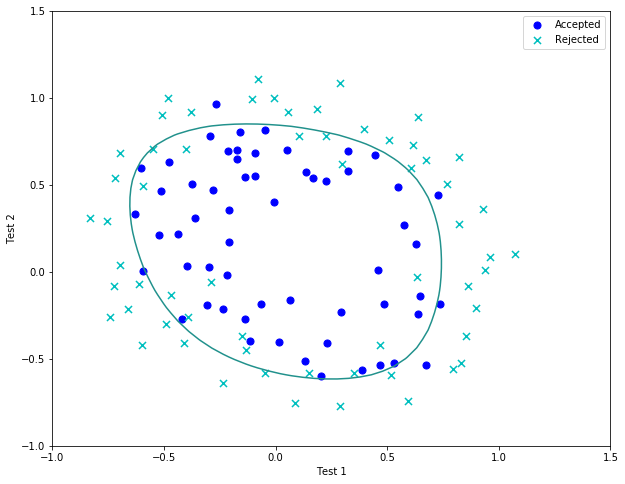

In [8]:
theta_better = np.matrix(result[0]).T;
u = np.linspace(-1,1.5,50);
v = np.linspace(-1,1.5,50);
z = np.zeros([len(u),len(v)]);
for i in range(0,len(u)):
    for j in range(0,len(v)):
        z[i][j] = map_feature([u[i]],[v[j]])*theta_better;

z = z.T;
fig,ax = plt.subplots(figsize=(10,8));
ax.contour(u,v,z,0);
plot_data(ax);
plt.show();

# Test accuracy rate

In [9]:
predictions = predict(theta_better, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(predictions))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 98%
